# DAV Experiment-5

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('covid-19_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497760 entries, 0 to 497759
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Date_reported      497760 non-null  object 
 1   Country_code       495686 non-null  object 
 2   Country            497760 non-null  object 
 3   WHO_region         497760 non-null  object 
 4   New_cases          210851 non-null  float64
 5   Cumulative_cases   497760 non-null  int64  
 6   New_deaths         154162 non-null  float64
 7   Cumulative_deaths  497760 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 30.4+ MB


In [ ]:
df.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-04,AI,Anguilla,AMR,NaN,0,NaN,0
1,2020-01-04,AZ,Azerbaijan,EUR,NaN,0,NaN,0
2,2020-01-04,BD,Bangladesh,SEAR,0.0,0,0.0,0
3,2020-01-04,BB,Barbados,AMR,NaN,0,NaN,0
4,2020-01-04,BR,Brazil,AMR,NaN,0,NaN,0


In [ ]:
df.tail()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
497755,2025-09-07,SY,Syrian Arab Republic,EMR,NaN,57423,NaN,3163
497756,2025-09-07,LK,Sri Lanka,SEAR,NaN,672812,NaN,16907
497757,2025-09-07,VC,Saint Vincent and the Grenadines,AMR,NaN,9674,NaN,124
497758,2025-09-07,SN,Senegal,AFR,NaN,89407,NaN,1972
497759,2025-09-07,RW,Rwanda,AFR,NaN,133273,NaN,1468


In [ ]:
df.describe()

,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
count,2.108510e+05,4.977600e+05,154162.000000,4.977600e+05
mean,3.692716e+03,2.064839e+06,46.066028,2.180901e+04
std,4.850583e+04,8.578176e+06,242.220344,8.720446e+04
min,-6.507900e+04,0.000000e+00,-3520.000000,0.000000e+00
25%,3.000000e+00,6.696000e+03,0.000000,4.100000e+01
50%,6.000000e+01,6.173250e+04,2.000000,6.970000e+02
75%,6.740000e+02,6.611030e+05,15.000000,7.998000e+03
max,6.966046e+06,1.034368e+08,44047.000000,1.227665e+06


In [ ]:
df.columns

Index(['Date_reported', 'Country_code', 'Country', 'WHO_region', 'New_cases',
       'Cumulative_cases', 'New_deaths', 'Cumulative_deaths'],
      dtype='object')

In [ ]:
df.shape

(497760, 8)

Data Cleaning

In [ ]:
df['Date_reported'] = pd.to_datetime(df['Date_reported'])

df[['Country_code', 'New_cases', 'New_deaths', 'Cumulative_cases', 'Cumulative_deaths']] = df[['Country_code', 'New_cases', 'New_deaths', 'Cumulative_cases', 'Cumulative_deaths']].fillna(0)

df['New_cases'] = df['New_cases'].apply(lambda x: x if x >= 0 else 0)
df['New_deaths'] = df['New_deaths'].apply(lambda x: x if x >= 0 else 0)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497760 entries, 0 to 497759
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Date_reported      497760 non-null  datetime64[ns]
 1   Country_code       497760 non-null  object        
 2   Country            497760 non-null  object        
 3   WHO_region         497760 non-null  object        
 4   New_cases          497760 non-null  float64       
 5   Cumulative_cases   497760 non-null  int64         
 6   New_deaths         497760 non-null  float64       
 7   Cumulative_deaths  497760 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(3)
memory usage: 30.4+ MB


Histogram

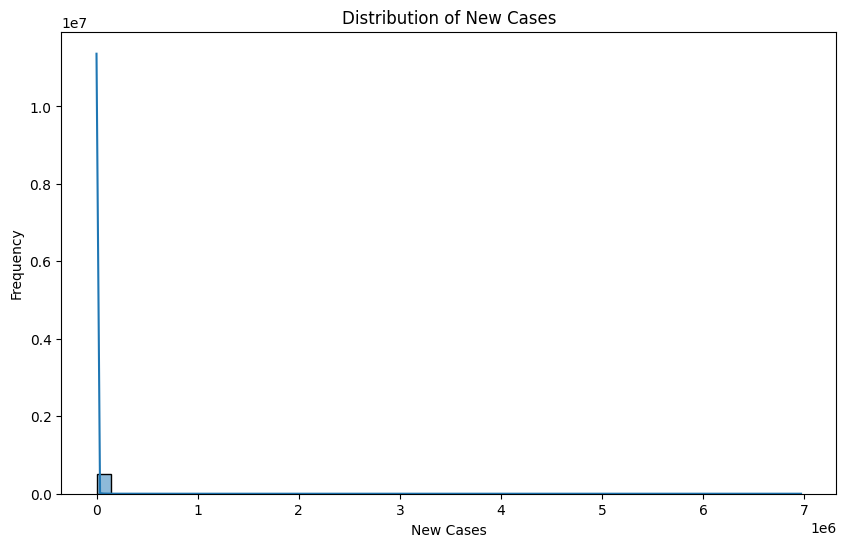

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['New_cases'], bins=50, kde=True)
plt.title('Distribution of New Cases')
plt.xlabel('New Cases')
plt.ylabel('Frequency')
plt.show()

Scatter Plot

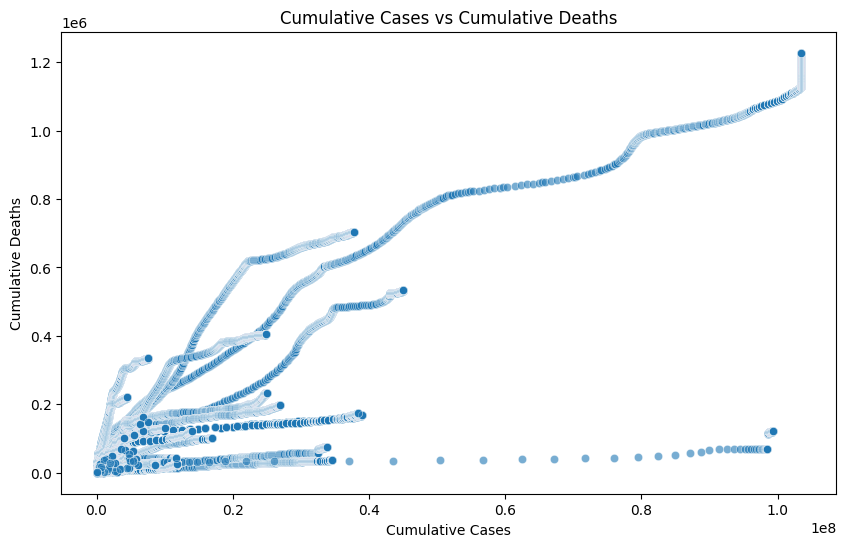

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Cumulative_cases', y='Cumulative_deaths', alpha=0.6)
plt.title('Cumulative Cases vs Cumulative Deaths')
plt.xlabel('Cumulative Cases')
plt.ylabel('Cumulative Deaths')
plt.show()

Bar Plot

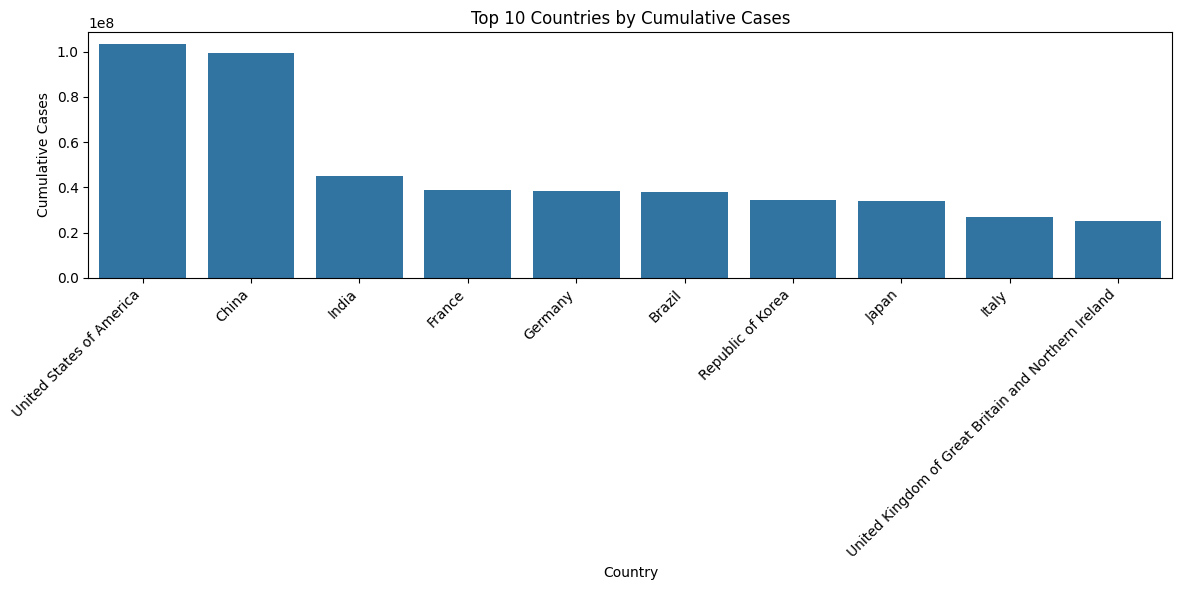

In [ ]:
top_countries = df.groupby('Country')['Cumulative_cases'].max().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries.values)
plt.title('Top 10 Countries by Cumulative Cases')
plt.xlabel('Country')
plt.ylabel('Cumulative Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Line Plot

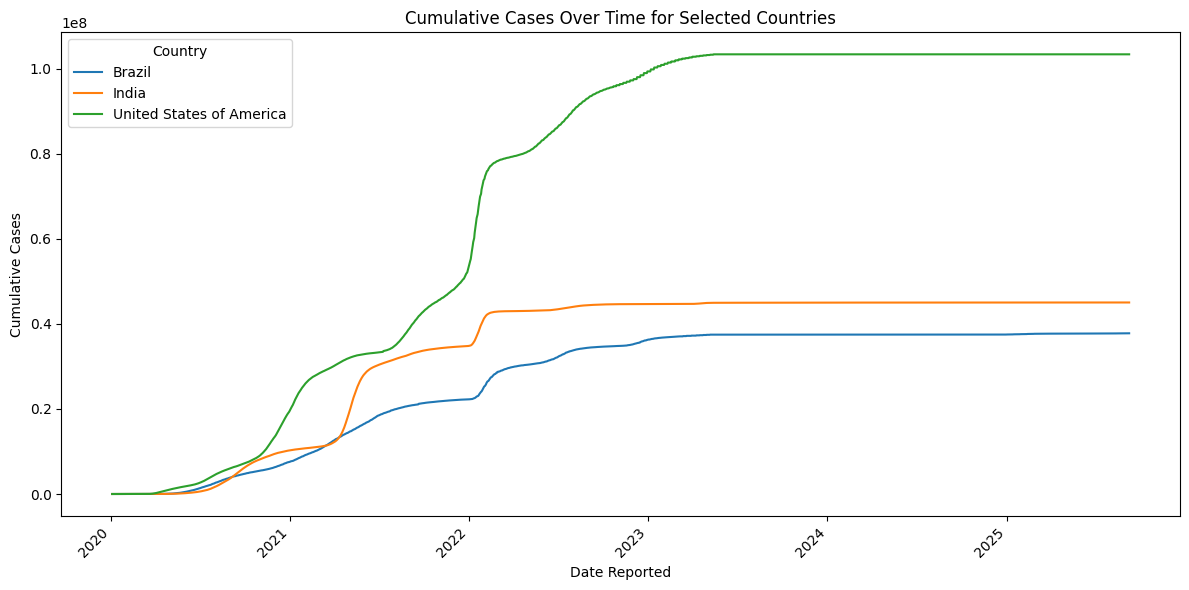

In [ ]:
selected_countries = ['United States of America', 'India', 'Brazil', 'United Kingdom']

df_selected = df[df['Country'].isin(selected_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='Date_reported', y='Cumulative_cases', hue='Country')
plt.title('Cumulative Cases Over Time for Selected Countries')
plt.xlabel('Date Reported')
plt.ylabel('Cumulative Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# DAV Experiment-6

Heatmap

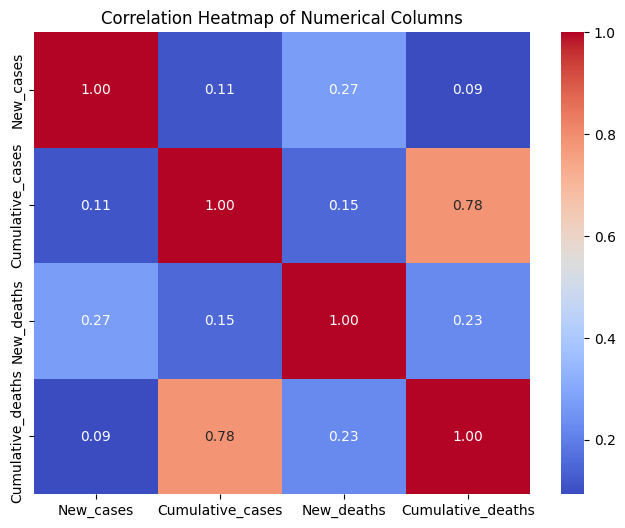

In [ ]:
correlation_matrix = df[['New_cases', 'Cumulative_cases', 'New_deaths', 'Cumulative_deaths']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

Violin plot

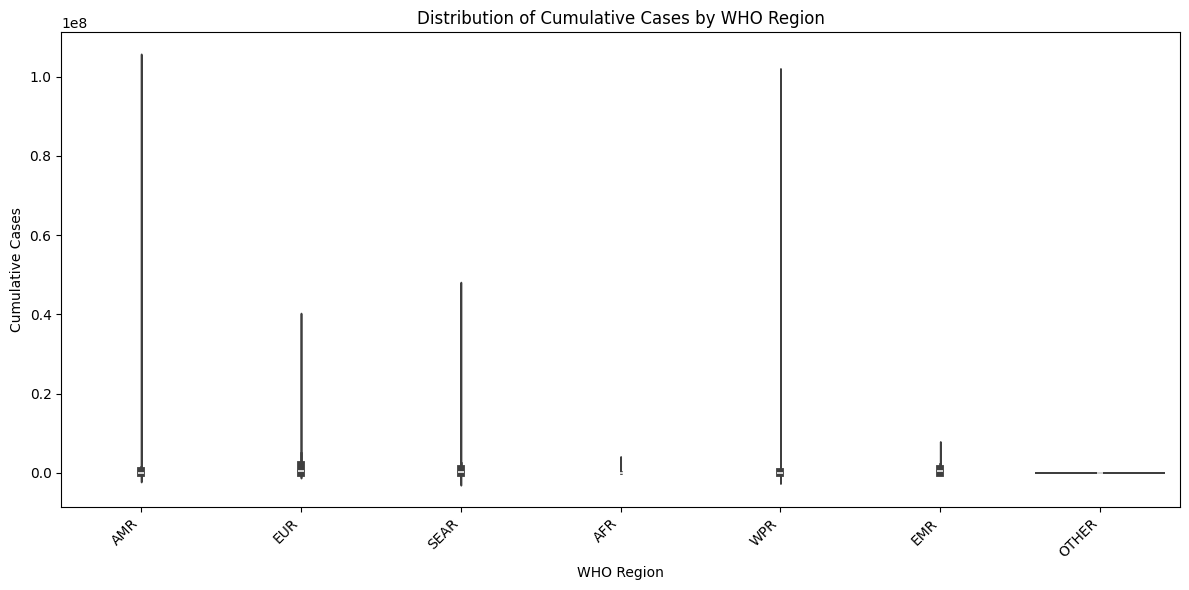

In [ ]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x='WHO_region', y='Cumulative_cases')
plt.yscale('log') # Apply logarithmic scale to the y-axis
plt.title('Distribution of Cumulative Cases by WHO Region (Log Scale)')
plt.xlabel('WHO Region')
plt.ylabel('Cumulative Cases (Log Scale)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()